<a href="https://colab.research.google.com/github/matusoff/Molecular-dynamics-with-BioPython/blob/main/Time_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

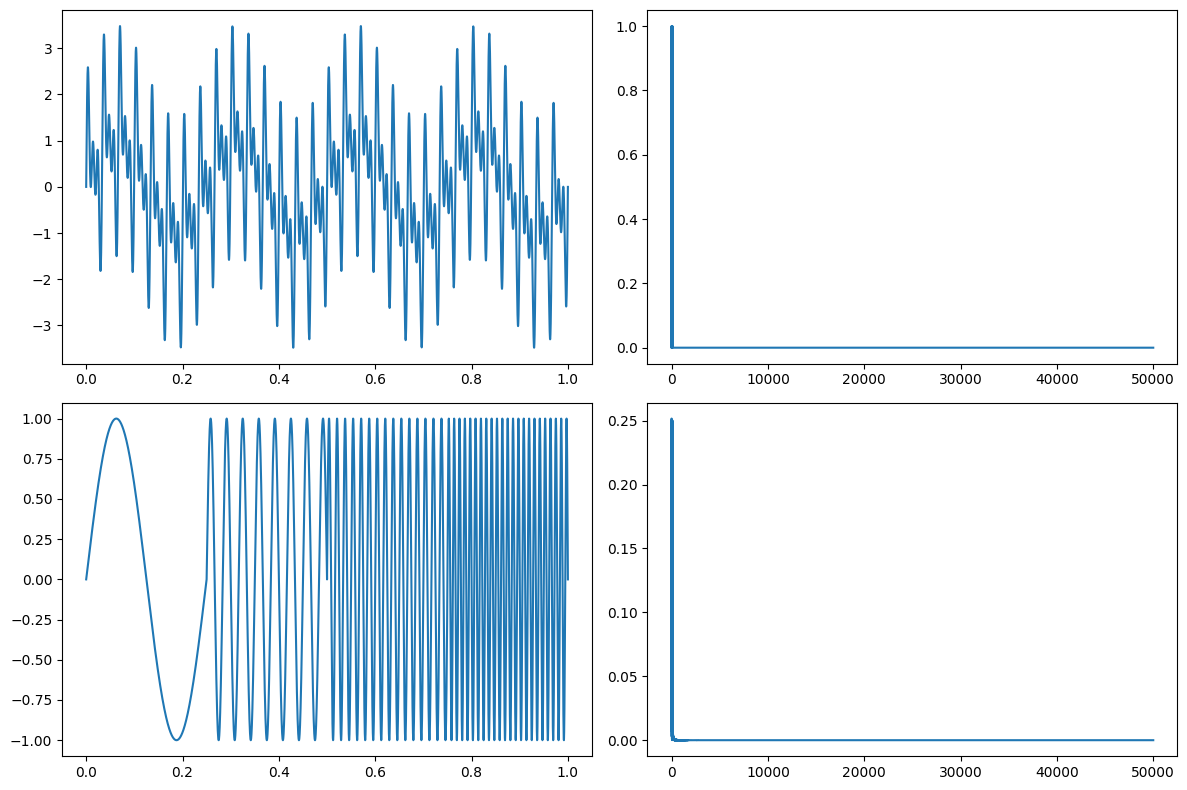

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = np.fft.fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

# Your existing code here, with the fix for xb:
t_n = 1
N = 100000
T = t_n / N
f_s = 1/T

xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=int(N/4))

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, np.concatenate([y1b, y2b, y3b, y4b]))  # Adjusted to use the actual signals
axarr[0,1].plot(f_values1, fft_values1)
axarr[1,1].plot(f_values2, fft_values2)

plt.tight_layout()
plt.show()


In [ ]:
import pywt
print(pywt.families(short=False))
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal',
'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet',
'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


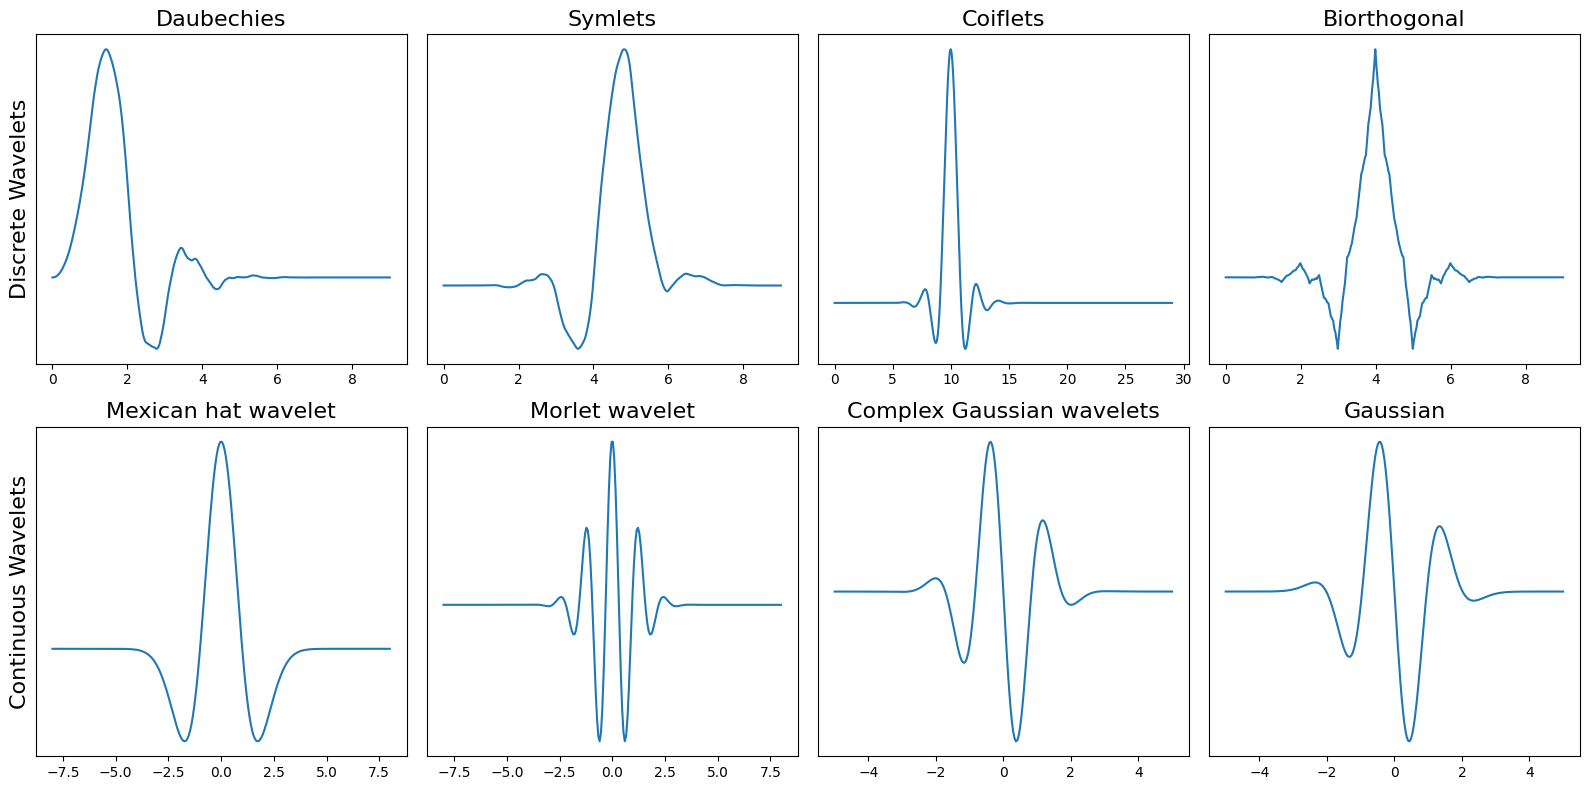

In [ ]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

['db1', 'db2', 'db3', 'db4', 'db5']


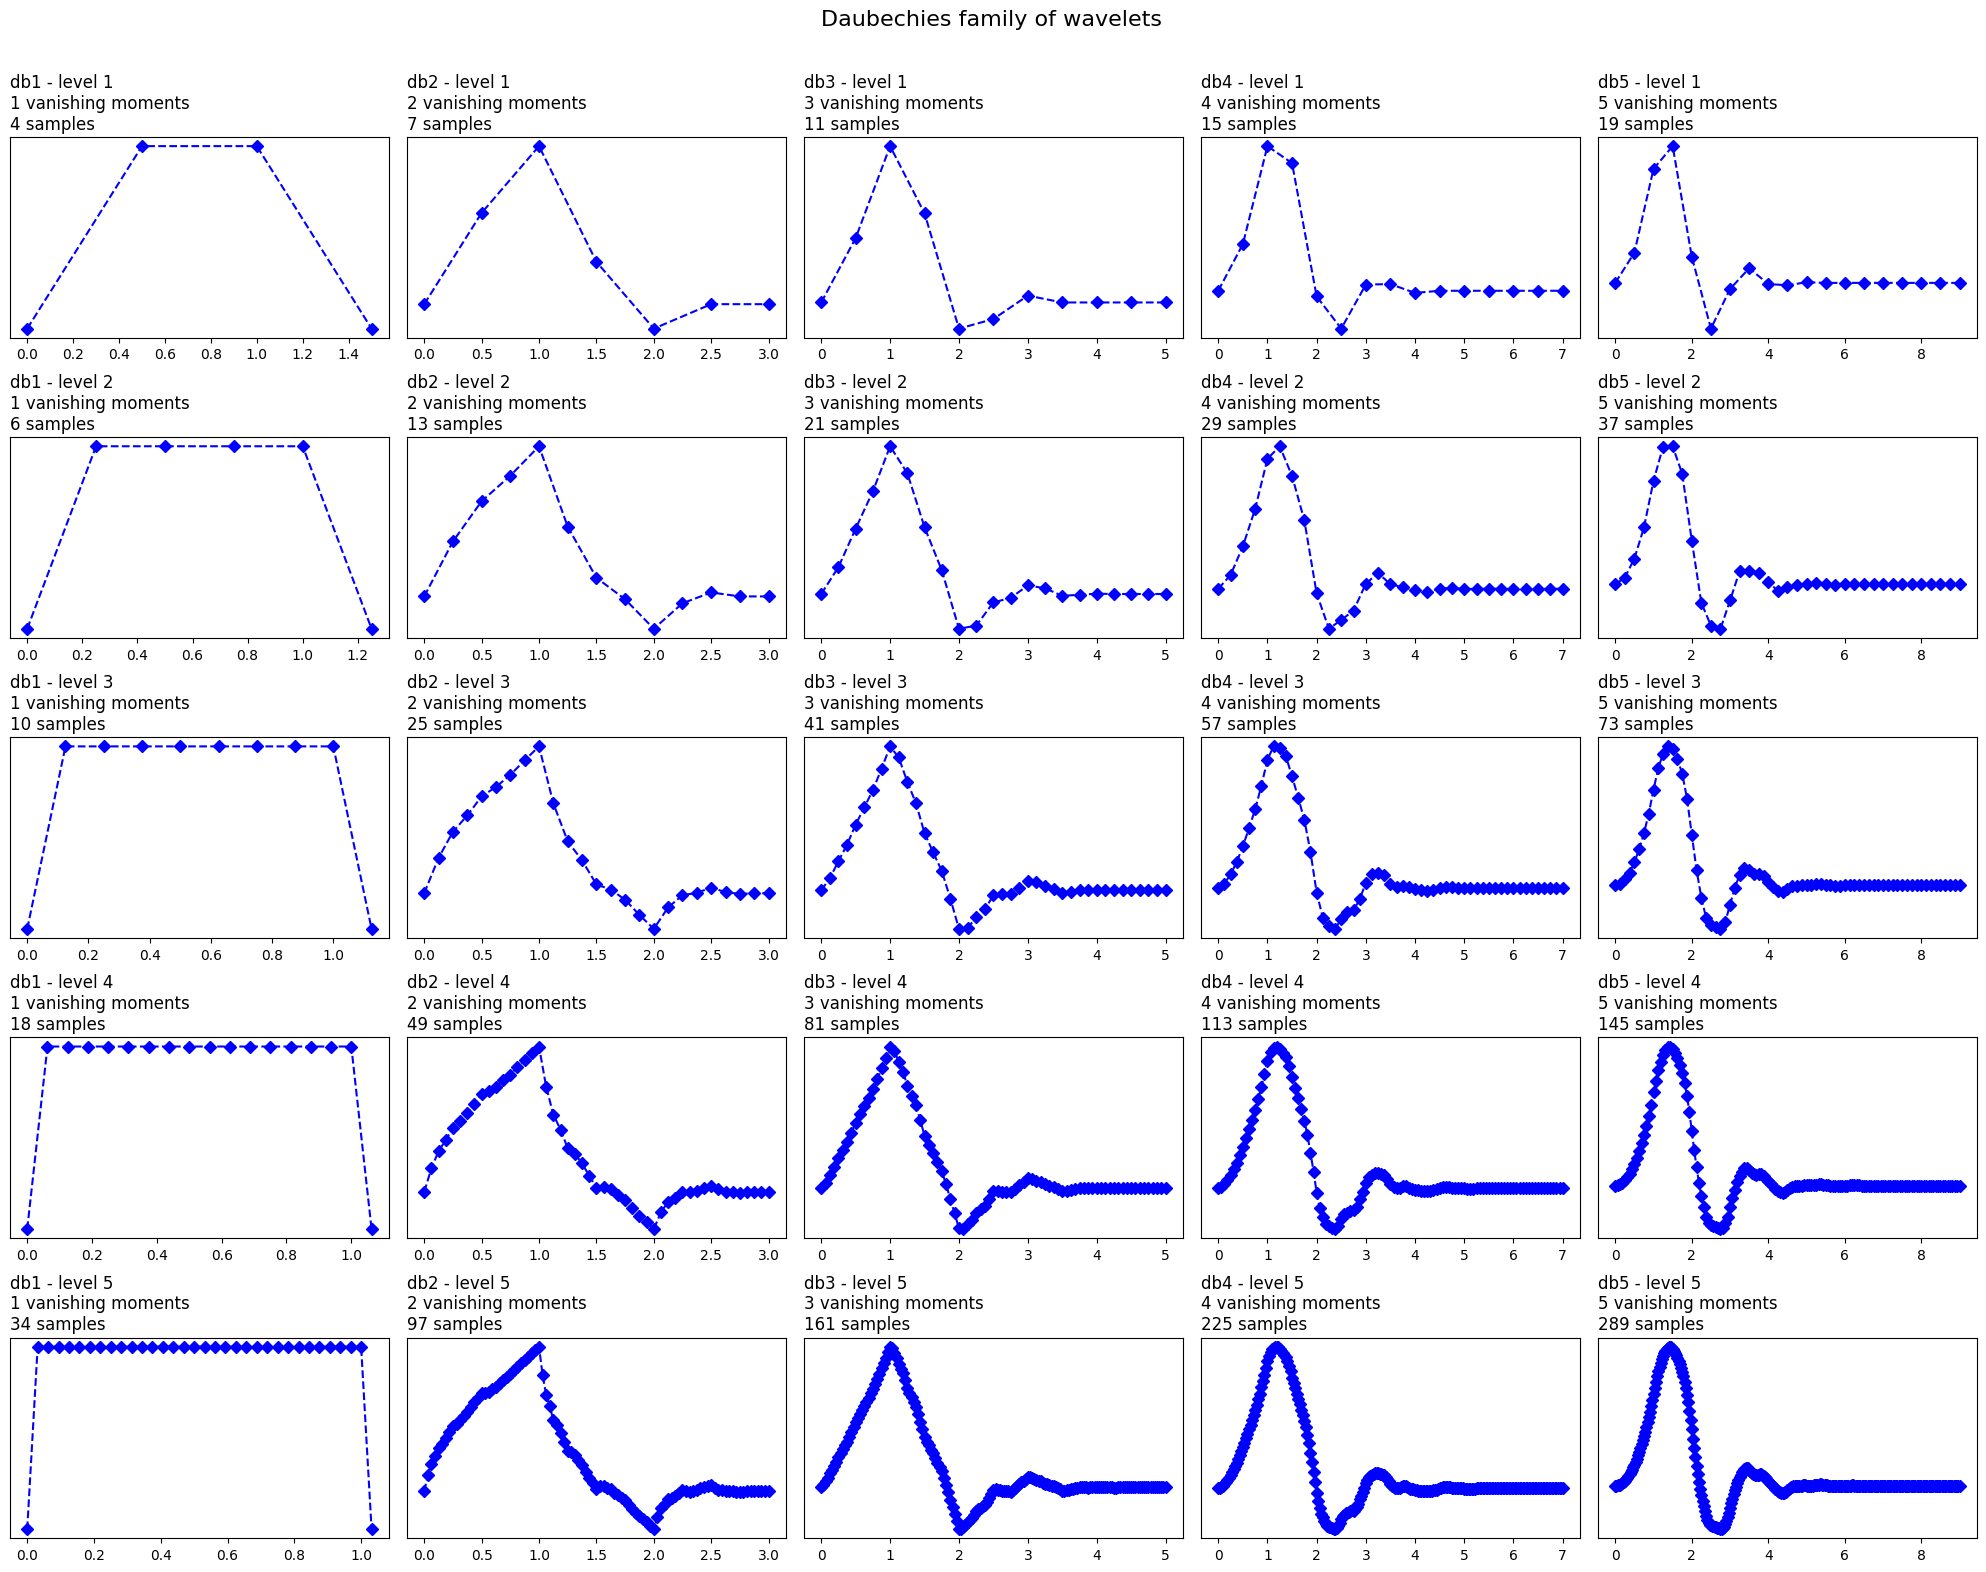

In [ ]:
import pywt
import matplotlib.pyplot as plt

db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
['db1', 'db2', 'db3', 'db4', 'db5']

fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

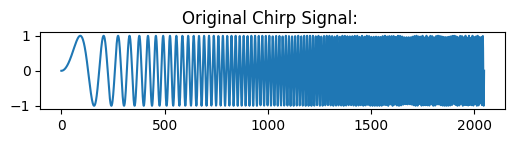

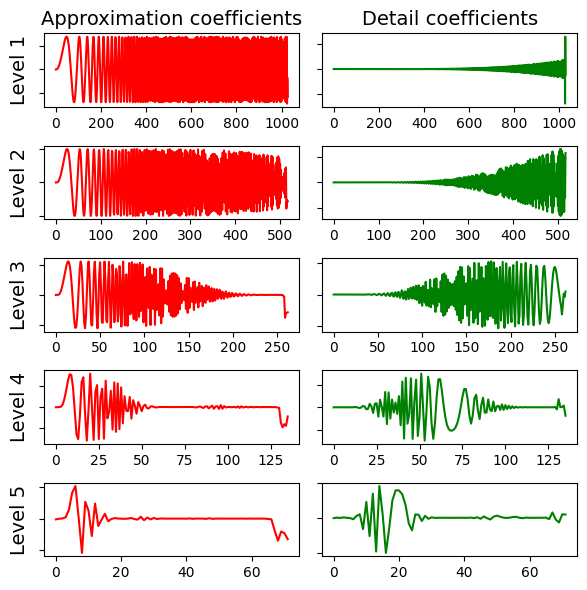

In [ ]:
import pywt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)

fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()

data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

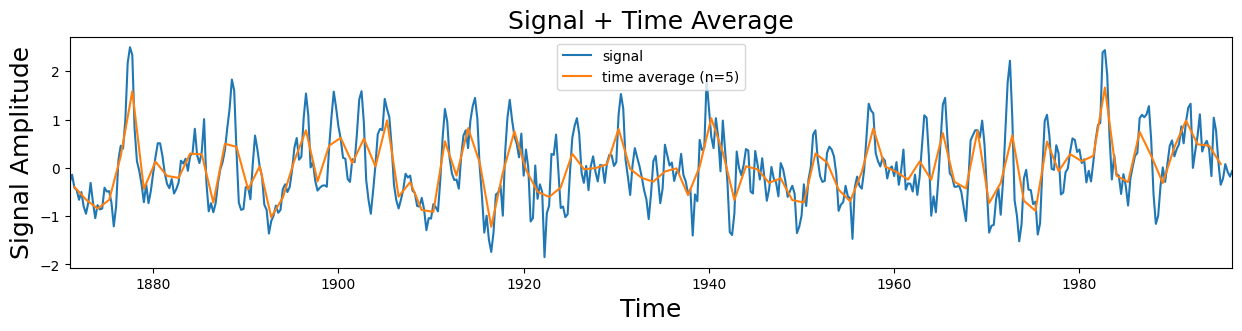

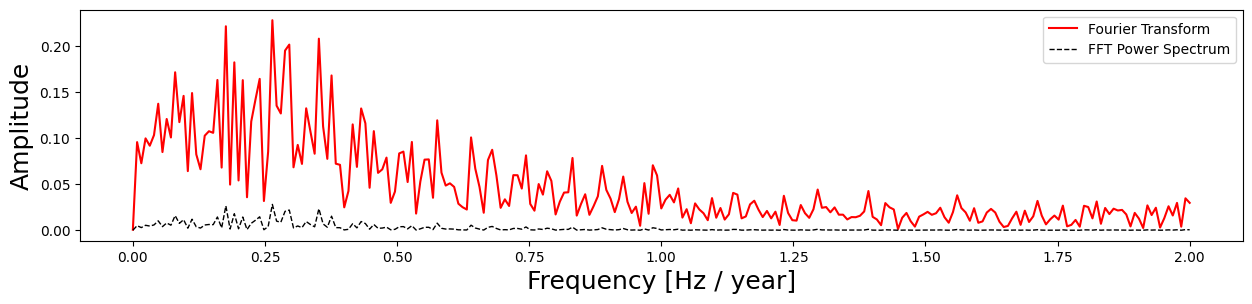

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


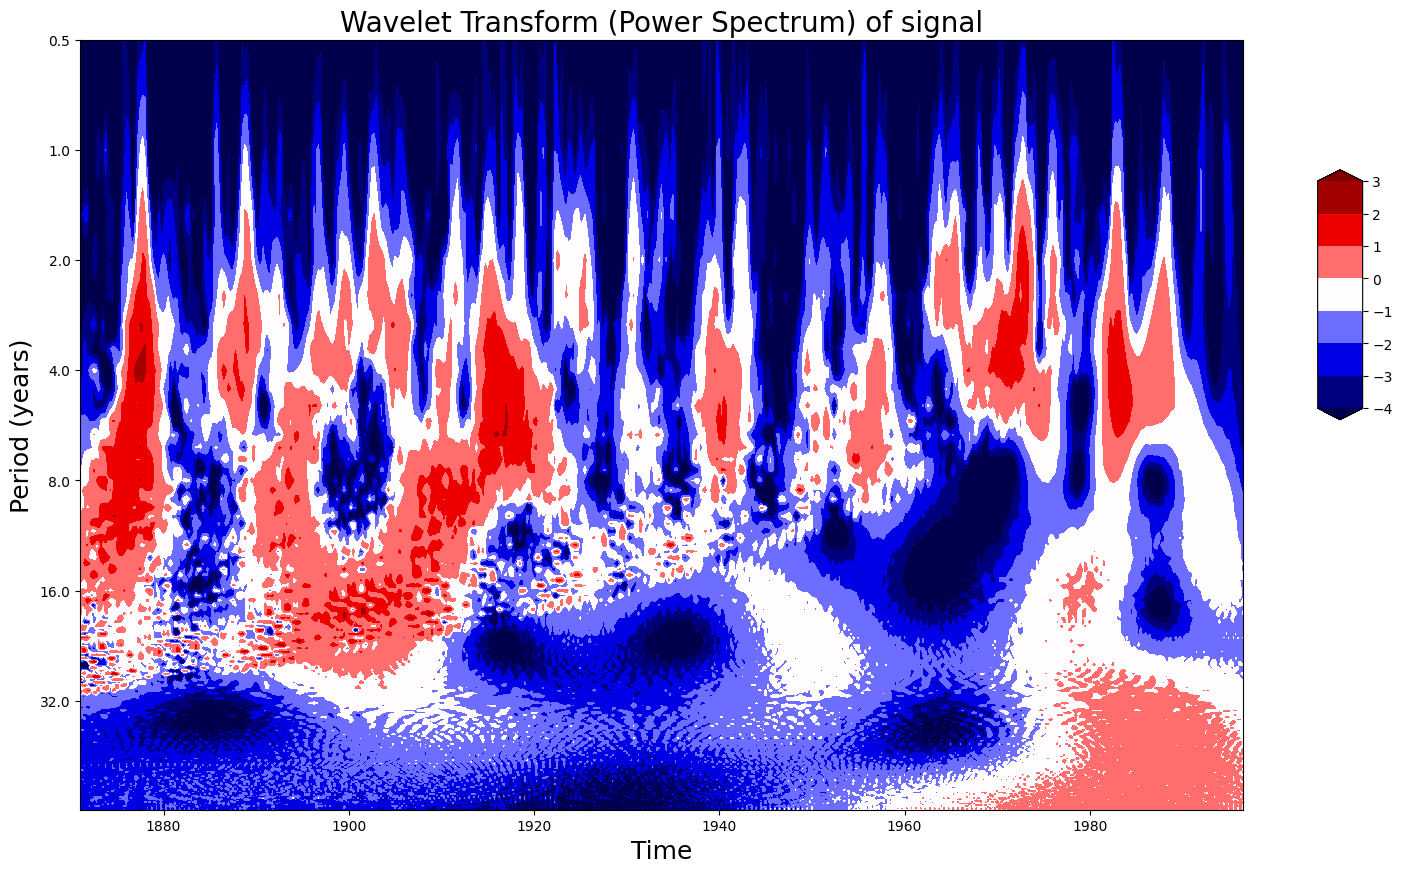

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt
from numpy.fft import fft

def plot_wavelet(time, signal, scales,
                 waveletname = 'cmor',
                 cmap = plt.cm.seismic,
                 title = 'Wavelet Transform (Power Spectrum) of signal',
                 ylabel = 'Period (years)',
                 xlabel = 'Time'):

    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)

    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)

    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)

    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)

    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

def get_ave_values(time, signal, average_over):
    # Ensure average_over is an integer greater than 1
    average_over = max(int(average_over), 1)
    signal_len = len(signal)
    time_ave = np.arange(0, signal_len, average_over)
    signal_ave = np.array([np.mean(signal[i:i+average_over]) for i in range(0, signal_len, average_over)])
    return time_ave, signal_ave

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = np.fft.fft(y_values)  # Use np.fft.fft here
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

# def plot_signal_plus_average(time, signal, average_over = 5):
#     fig, ax = plt.subplots(figsize=(15, 3))
#     time_ave, signal_ave = get_ave_values(time, signal, average_over)
#     ax.plot(time, signal, label='signal')
#     ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
#     ax.set_xlim([time[0], time[-1]])
#     ax.set_ylabel('Signal Amplitude', fontsize=18)
#     ax.set_title('Signal + Time Average', fontsize=18)
#     ax.set_xlabel('Time', fontsize=18)
#     ax.legend()
#     plt.show()

def get_ave_values(time, signal, average_over):
    # Calculate the number of chunks to divide the signal into
    n_chunks = len(signal) // average_over

    # Pre-allocate arrays for averaged time and signal
    time_ave = np.zeros(n_chunks)
    signal_ave = np.zeros(n_chunks)

    for i in range(n_chunks):
        # Calculate the start and end indices of the current chunk
        start_idx = i * average_over
        end_idx = start_idx + average_over

        # Compute the average time and signal values for the current chunk
        time_ave[i] = np.mean(time[start_idx:end_idx])
        signal_ave[i] = np.mean(signal[start_idx:end_idx])

    return time_ave, signal_ave

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt

    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()

dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

scales = np.arange(1, 128)
plot_signal_plus_average(time, signal)
plot_fft_plus_power(time, signal)
plot_wavelet(time, signal, scales)

In [ ]:
import os

def read_signals_ucihar(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels_ucihar(filename):
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities

def load_ucihar_data(folder):
    train_folder = folder + 'train/InertialSignals/'
    test_folder = folder + 'test/InertialSignals/'
    labelfile_train = folder + 'train/y_train.txt'
    labelfile_test = folder + 'test/y_test.txt'
    train_signals, test_signals = [], []
    for input_file in os.listdir(train_folder):
        signal = read_signals_ucihar(train_folder + input_file)
        train_signals.append(signal)
    train_signals = np.transpose(np.array(train_signals), (1, 2, 0))
    for input_file in os.listdir(test_folder):
        signal = read_signals_ucihar(test_folder + input_file)
        test_signals.append(signal)
    test_signals = np.transpose(np.array(test_signals), (1, 2, 0))
    train_labels = read_labels_ucihar(labelfile_train)
    test_labels = read_labels_ucihar(labelfile_test)
    return train_signals, train_labels, test_signals, test_labels

folder_ucihar = './data/UCI_HAR/'
train_signals_ucihar, train_labels_ucihar, test_signals_ucihar, test_labels_ucihar = load_ucihar_data(folder_ucihar)

FileNotFoundError: [Errno 2] No such file or directory: './data/UCI_HAR/train/InertialSignals/'

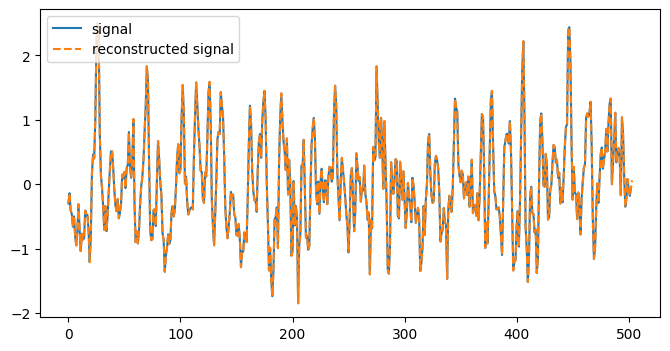

In [ ]:
(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


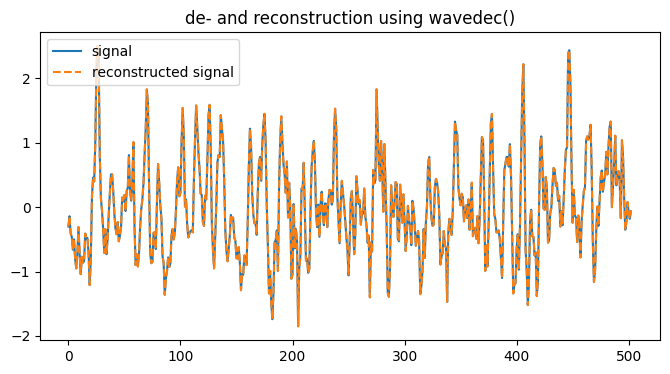

In [ ]:
coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

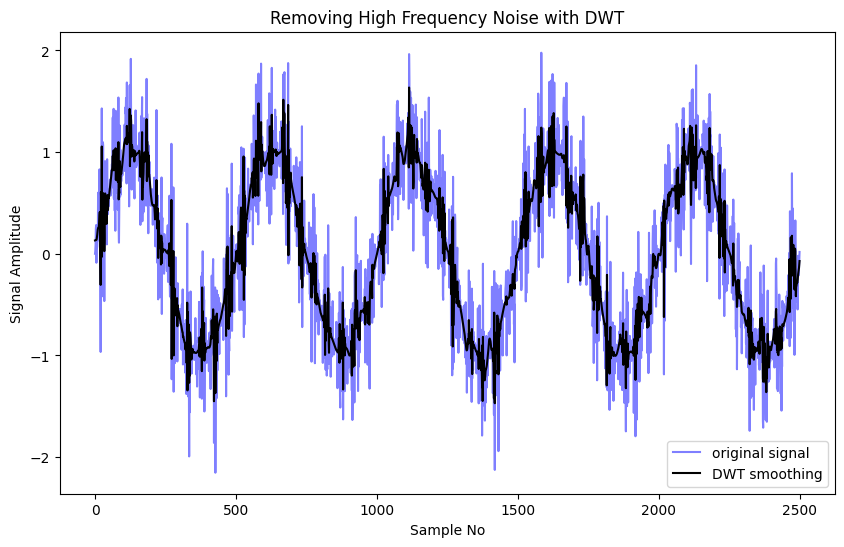

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a signal with higher frequency noise
np.random.seed(0)  # For reproducibility
n_samples = 2500
time = np.arange(n_samples)
frequency = 5  # Frequency of the signal
signal = np.sin(2 * np.pi * frequency * time / n_samples)
# Add high frequency noise
high_freq_noise = np.random.normal(0, 0.5, n_samples) * np.sin(10 * np.pi * frequency * time / n_samples)
noisy_signal = signal + high_freq_noise

# Apply DWT to remove high-frequency noise
wavelet = 'db4'  # Daubechies wavelet
coeffs = pywt.wavedec(noisy_signal, wavelet, level=4)
threshold = 0.4  # Adjusted threshold for denoising
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Plot the original and denoised signals
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='original signal', color='blue', alpha=0.5)
plt.plot(reconstructed_signal, label='DWT smoothing', color='black')
plt.title('Removing High Frequency Noise with DWT')
plt.xlabel('Sample No')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.show()
